(0.0, 1.0, 0.0, 1.0)

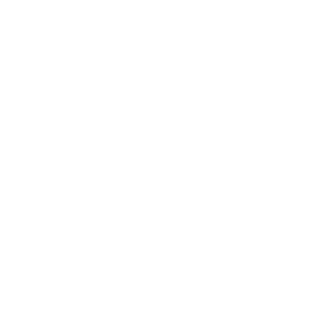

In [188]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (4, 4)
plt.axis("off")

# **Graph:**
- A graph is a data structure consisting of two components: nodes (vertices) and edges.

- A graph G can be defined as G = (V, E), where V is the set of nodes, and E are the edges between them.

# **Graph**
- By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc).
- In NetworkX, nodes can be any hashable object e.g. a text string, an image, an XML object, another Graph, a customized node object, etc.
- (Note: Python’s None object should not be used as a node as it determines whether optional function arguments have been assigned in many functions.)

In [189]:
graph = nx.Graph()

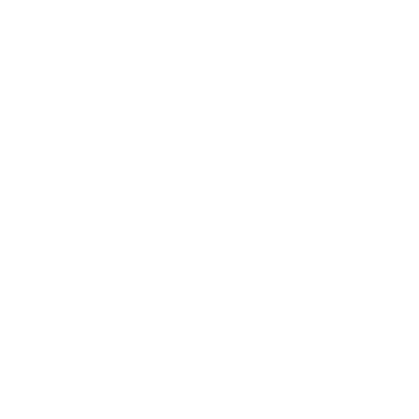

In [190]:
nx.draw(graph)

# **Nodes**
- The "graph" can be grown in several ways.
- NetworkX includes many graph generator functions and facilities to read and write graphs in many formats.
- To get started though we’ll look at simple manipulations.
You can add one node at a time,

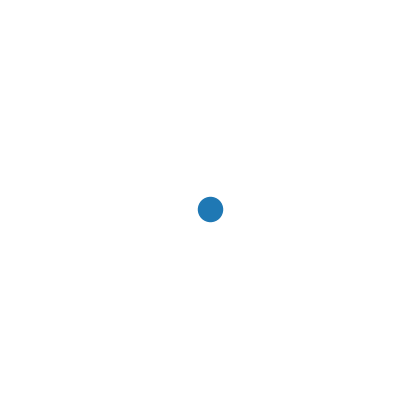

In [191]:
# Adding just 1 node:
graph.add_node(1)
nx.draw(graph)

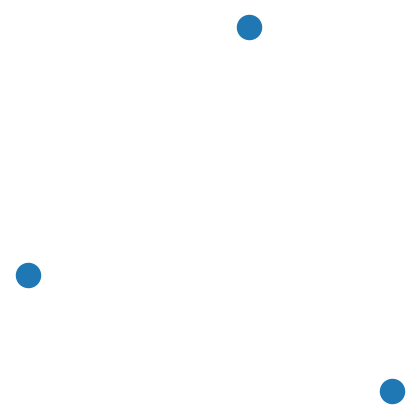

In [192]:
# Adding list of nodes. Here we are adding 2 more nodes:
graph.add_nodes_from([2, 3])
nx.draw(graph)
# It randomly generates 2 more nodes:

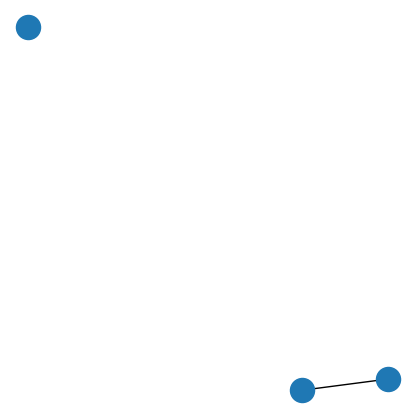

In [193]:
graph.add_edge(1, 2)
nx.draw(graph)

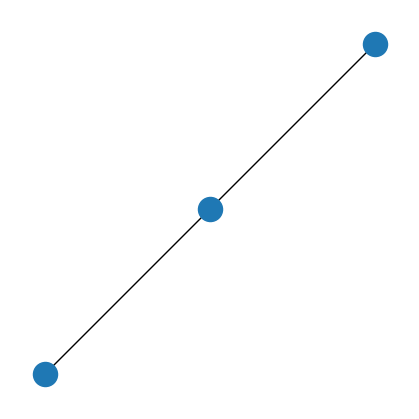

In [194]:
graph.add_edge(2, 3)
nx.draw(graph)

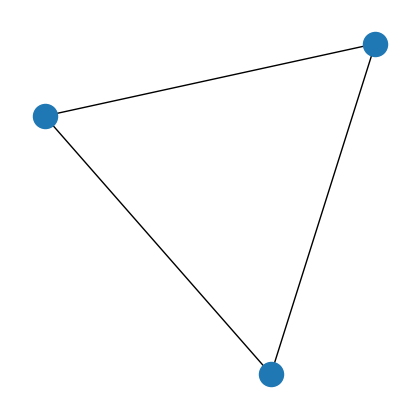

In [195]:
graph.add_edge(1, 3)
nx.draw(graph)

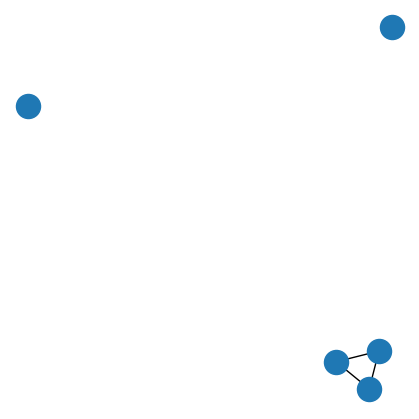

In [196]:
graph.add_nodes_from([4, 5])
nx.draw(graph)

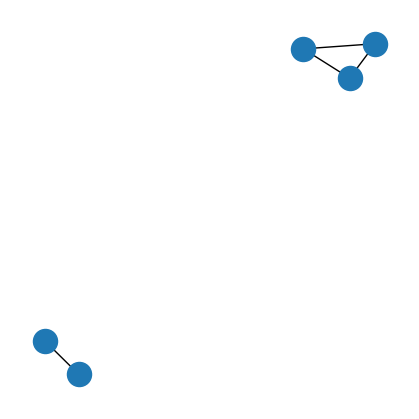

In [197]:
graph.add_edge(4, 5)
nx.draw(graph)

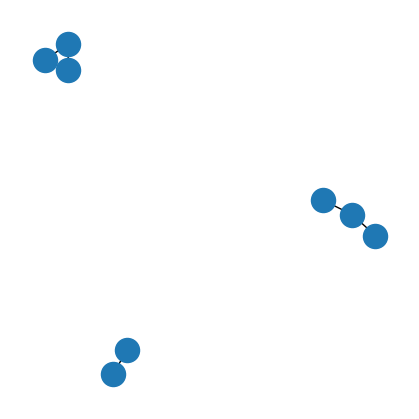

In [198]:
graph.add_nodes_from([6,7,8])
graph.add_edge(6,7)
graph.add_edge(7,8)
nx.draw(graph)

In [199]:
graph.number_of_nodes()

8

In [200]:
graph.number_of_edges()

6

In [201]:
graph.edges()  # returns list of edges

EdgeView([(1, 2), (1, 3), (2, 3), (4, 5), (6, 7), (7, 8)])

In [202]:
from networkx.readwrite import json_graph
json_data = json_graph.node_link_data(graph)
json_data

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 8}],
 'links': [{'source': 1, 'target': 2},
  {'source': 1, 'target': 3},
  {'source': 2, 'target': 3},
  {'source': 4, 'target': 5},
  {'source': 6, 'target': 7},
  {'source': 7, 'target': 8}]}

In [203]:
graph.is_directed()

False

Getting list of all the neighbors

In [204]:
from networkx.classes.function import neighbors
print(neighbors(graph, 1))

from networkx.classes.function import all_neighbors
print(all_neighbors(graph, 3))

print(graph.nodes())
print(graph.edges())

for node in graph.nodes():
    print(node, list(graph.neighbors(node)))

[1, 2, 3, 4, 5, 6, 7, 8]
[(1, 2), (1, 3), (2, 3), (4, 5), (6, 7), (7, 8)]
1 [2, 3]
2 [1, 3]
3 [2, 1]
4 [5]
5 [4]
6 [7]
7 [6, 8]
8 [7]


Directional Graph

[(1, 2), (2, 3), (3, 4), (4, 5)]
[(1, 2, {'weight': 5}), (2, 3, {'weight': 10}), (3, 4, {'weight': 15}), (4, 5, {'weight': 20})]
True
True


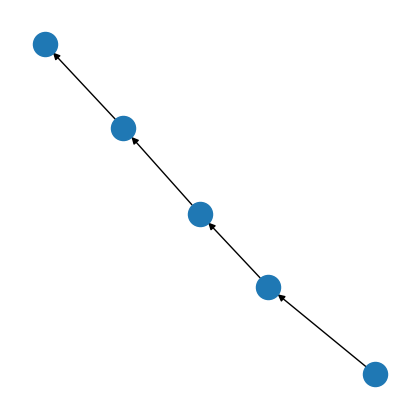

In [205]:
directional_graph = nx.DiGraph()
directional_graph.add_edge(1, 2, weight = 5)
directional_graph.add_edge(2, 3, weight = 10)
directional_graph.add_edge(3, 4, weight = 15)
directional_graph.add_edge(4, 5, weight = 20)
nx.draw(directional_graph)

print(directional_graph.edges())
print(directional_graph.edges(data=True))
print(nx.is_directed(directional_graph))
print(nx.is_weighted(directional_graph))

Neighbor and Adjacency

[('a', 'b'), ('c', 'b'), ('c', 'd'), ('d', 'e')]
[('a', 'b', {'weight': 5}), ('c', 'b', {'weight': 10}), ('c', 'd', {'weight': 15}), ('d', 'e', {'weight': 20})]
True


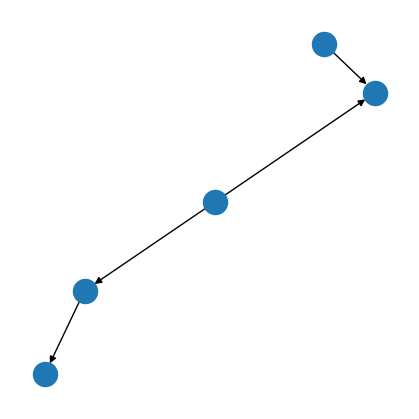

In [206]:
# Instead of numbers, we can use characters:

directional_graph2 = nx.DiGraph()
directional_graph2.add_edge("a", "b", weight = 5)
directional_graph2.add_edge("c", "b", weight = 10)
directional_graph2.add_edge("c", "d", weight = 15)
directional_graph2.add_edge("d", "e", weight = 20)
nx.draw(directional_graph2)

print(directional_graph2.edges())
print(directional_graph2.edges(data=True))
print(nx.is_directed(directional_graph2))

In [207]:
for nodes in directional_graph2.nodes():
    print(nodes, list(directional_graph2.neighbors(nodes)))

a ['b']
b []
c ['b', 'd']
d ['e']
e []


In [208]:
adjacency_matrix = nx.adjacency_matrix(directional_graph2)
print()
print(adjacency_matrix.todense())


[[ 0  5  0  0  0]
 [ 0  0  0  0  0]
 [ 0 10  0 15  0]
 [ 0  0  0  0 20]
 [ 0  0  0  0  0]]


In [209]:
adjacency_matrix.diagonal()

array([0, 0, 0, 0, 0])

[(1, 2), (2, 1), (3, 4), (4, 4)]
[(1, 2, {'weight': 5}), (2, 1, {'weight': 10}), (3, 4, {'weight': 50}), (4, 4, {'weight': 30})]
True
True

[[ 0  5  0  0]
 [10  0  0  0]
 [ 0  0  0 50]
 [ 0  0  0 30]]


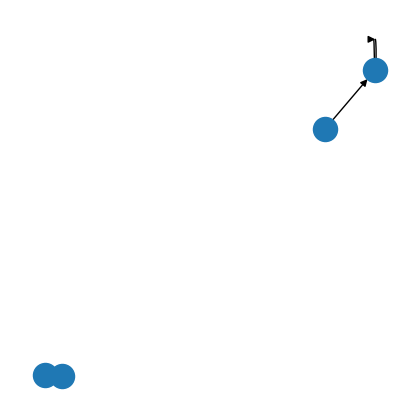

In [210]:
# Multidirectional graph:

multidirectional_graph = nx.MultiDiGraph()
multidirectional_graph.add_edge(1, 2, weight = 5)
multidirectional_graph.add_edge(2, 1, weight = 10)
multidirectional_graph.add_edge(3, 4, weight = 50)
multidirectional_graph.add_edge(4, 4, weight = 30)
nx.draw(multidirectional_graph)

print(multidirectional_graph.edges())
print(multidirectional_graph.edges(data=True))
print(nx.is_directed(multidirectional_graph))
print(nx.is_weighted(multidirectional_graph))

adjacency_matrix_multidimensional = nx.adjacency_matrix(multidirectional_graph)
print()
print(adjacency_matrix_multidimensional.todense())

Setting a nonedge value different than 0, makes it much clearer to differentiate such 0-weighted edges and actual nonedge values.

In [211]:
print(nx.to_numpy_array(multidirectional_graph, nonedge=-1.))

[[-1.  5. -1. -1.]
 [10. -1. -1. -1.]
 [-1. -1. -1. 50.]
 [-1. -1. -1. 30.]]


Multiple Edge Attributes

In [212]:
# One edge may have more than 1 attribute. For example in the following you can see we have both cost and weight attributes for a specific edge.

[(1, 2), (3, 4), (4, 4)]
[(1, 2, {'weight': 10, 'cost': 10}), (3, 4, {'cost': 30}), (4, 4, {'weight': 30, 'cost': 20})]
False
False

[[ 0 10  0  0]
 [10  0  0  0]
 [ 0  0  0  1]
 [ 0  0  1 30]]


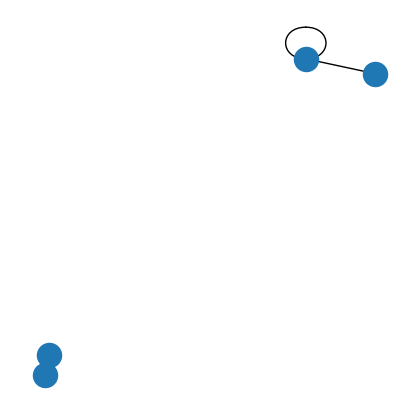

In [213]:
multi_edge = nx.Graph()
multi_edge.add_edge(1, 2, weight = 5, cost = 10)
multi_edge.add_edge(2, 1, weight = 10)
multi_edge.add_edge(3, 4, cost = 30)
multi_edge.add_edge(4, 4, weight = 30, cost = 20)
nx.draw(multi_edge)

print(multi_edge.edges())
print(multi_edge.edges(data=True))
print(nx.is_directed(multi_edge))
print(nx.is_weighted(multi_edge))

adjacency_matrix_multidimensional = nx.adjacency_matrix(multi_edge)
print()
print(adjacency_matrix_multidimensional.todense())

Sudoku Graph

81
810

[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


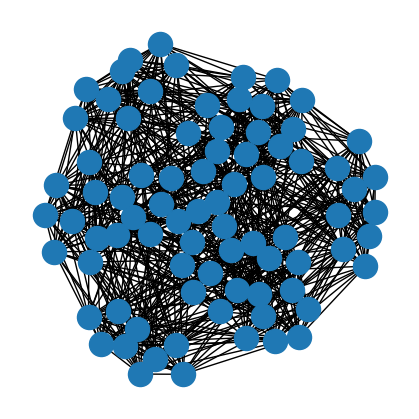

In [214]:
sudoku_graph = nx.sudoku_graph()
nx.draw(sudoku_graph)

print(sudoku_graph.number_of_nodes())
print(sudoku_graph.number_of_edges())
#print(sudoku_graph.edges())

sudoku_adj = nx.adjacency_matrix(sudoku_graph)
print()
print(sudoku_adj.todense())

16
56

[[0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0]
 [1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0]
 [1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0]
 [1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1]
 [1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0]
 [1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0]
 [0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0]
 [0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0]
 [0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0]
 [0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1]
 [0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1]
 [1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1]
 [0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1]
 [0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1]
 [0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0]]


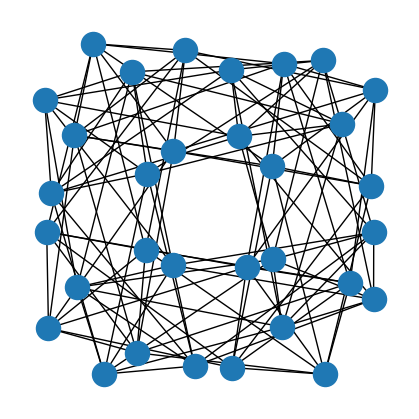

In [215]:
sudoku_graph = nx.sudoku_graph(2)
nx.draw(sudoku_graph)

print(sudoku_graph.number_of_nodes())
print(sudoku_graph.number_of_edges())

nx.draw(sudoku_graph)

sudoku_adj_2 = nx.adjacency_matrix(sudoku_graph)
print()
print(sudoku_adj_2.todense())

Grid Graph

24
46


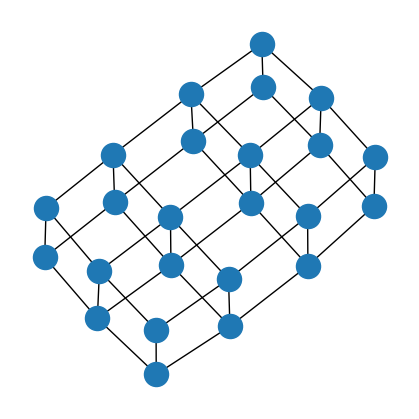

In [223]:
grid_graph = nx.grid_graph(dim=(2, 3, 4))
nx.draw(grid_graph)

print(grid_graph.number_of_nodes())
print(grid_graph.number_of_edges())

16


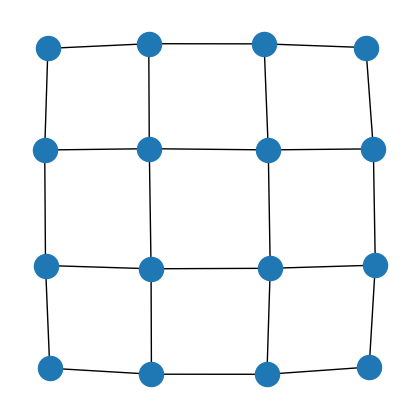

In [222]:
grid_graph_2 = nx.grid_graph(dim=([4, 4]))
nx.draw(grid_graph_2)

print(grid_graph_2.number_of_nodes())